<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dendrogram" data-toc-modified-id="Dendrogram-1">Dendrogram</a></span></li><li><span><a href="#계층형-군집-생성-&amp;-군집별-데이터-요약" data-toc-modified-id="계층형-군집-생성-&amp;-군집별-데이터-요약-2">계층형 군집 생성 &amp; 군집별 데이터 요약</a></span></li><li><span><a href="#K-평균-군집분석" data-toc-modified-id="K-평균-군집분석-3">K-평균 군집분석</a></span></li><li><span><a href="#DBSCAN-군집분석" data-toc-modified-id="DBSCAN-군집분석-4">DBSCAN 군집분석</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv('3data/직무능력평가.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [3]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [4]:
# 목표 변수
df_raw_y = df_raw_scaled[:, 0]

# 설명 변수
df_raw_x = df_raw_scaled[:, 1::]

In [5]:
df_raw.shape

(30, 7)

## Dendrogram

In [6]:
Z_ward = linkage(df_raw_x, method='ward', metric='euclidean')
Z_average = linkage(df_raw_x, method='average', metric='euclidean')
Z_Minkowski = linkage(df_raw_x, method='average', metric='minkowski')

Z_ward[:5]

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ]])

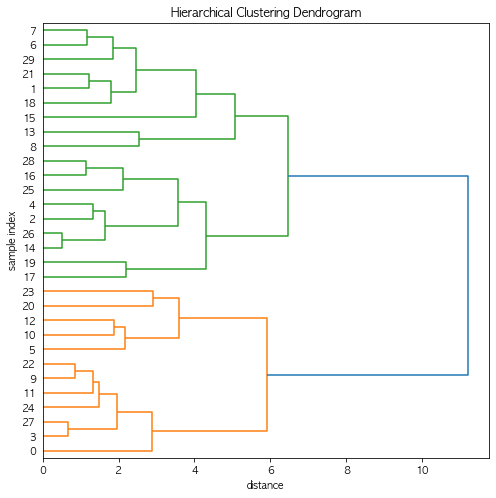

In [7]:
# 덴드로그램 (ward - euclidean)
plt.figure(figsize=(8,8))

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')
plt.show()

Text(0, 0.5, 'sample index')

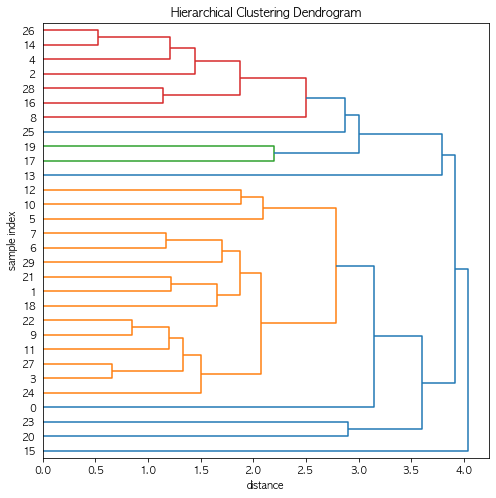

In [8]:
# 덴드로그램 (average - euclidean)
plt.figure(figsize=(8,8))

dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

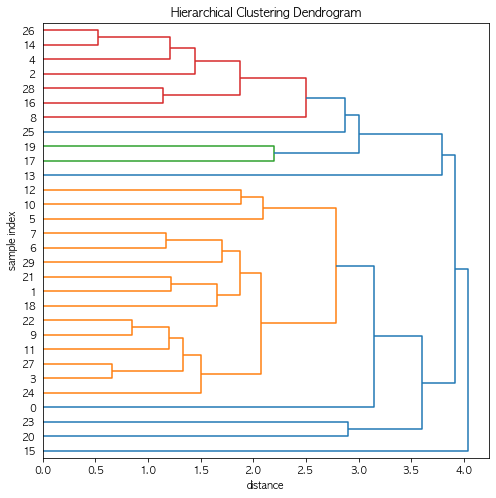

In [9]:
# 덴드로그램 (average - minkowski)
plt.figure(figsize=(8,8))

dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

## 계층형 군집 생성 & 군집별 데이터 요약

In [10]:
cluster_hierarchical = fcluster(Z=Z_ward, t=5, criterion='distance')

df_raw['ClusterHierarchical'] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [11]:
ds_summary_hc = df_raw.groupby('ClusterHierarchical').agg(['min', 'mean', 'max'])

level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace=True)

ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


## K-평균 군집분석

In [12]:
n_iter_cluster = 15
cluster_range = [ i+1 for i in range(n_iter_cluster) ]
clus_error = []

for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({'NumberofCluster': cluster_range, 'Error': clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.636837
3,4,79.167866
4,5,66.280319
5,6,56.195266
6,7,51.516323
7,8,43.567262
8,9,38.537370
9,10,32.912199


Text(0, 0.5, 'Sum of squared distance')

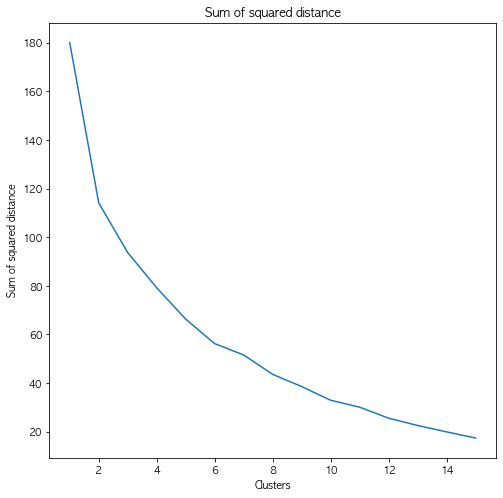

In [13]:
plt.figure(figsize=(8,8))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [14]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [ i+1 for i in clus.labels_ ]
df_raw['ClusterKmeans'] = cluster_kmeans

df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,3
1,63,64,51,54,63,73,47,5,3
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,3
4,81,78,56,66,71,83,47,3,2


In [15]:
ds_summary_km = df_raw.drop('ClusterHierarchical', axis=1, inplace=False).\
                        groupby('ClusterKmeans').agg(['min', 'mean', 'max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace=True)

ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
1,2,66,75.500,85,70,78.625,85,54,63.625,72,...,74,71,77.625,88,74,79.500,86,31,51.375,72
2,3,43,61.923,82,51,63.923,82,30,45.000,52,...,62,51,63.077,75,66,78.308,92,33,39.923,47
3,4,81,81.000,81,90,90.000,90,50,50.000,50,...,72,60,60.000,60,54,54.000,54,36,36.000,36
4,5,50,61.000,68,58,67.000,83,65,72.000,83,...,75,55,59.333,64,77,78.333,80,35,49.000,60


## DBSCAN 군집분석

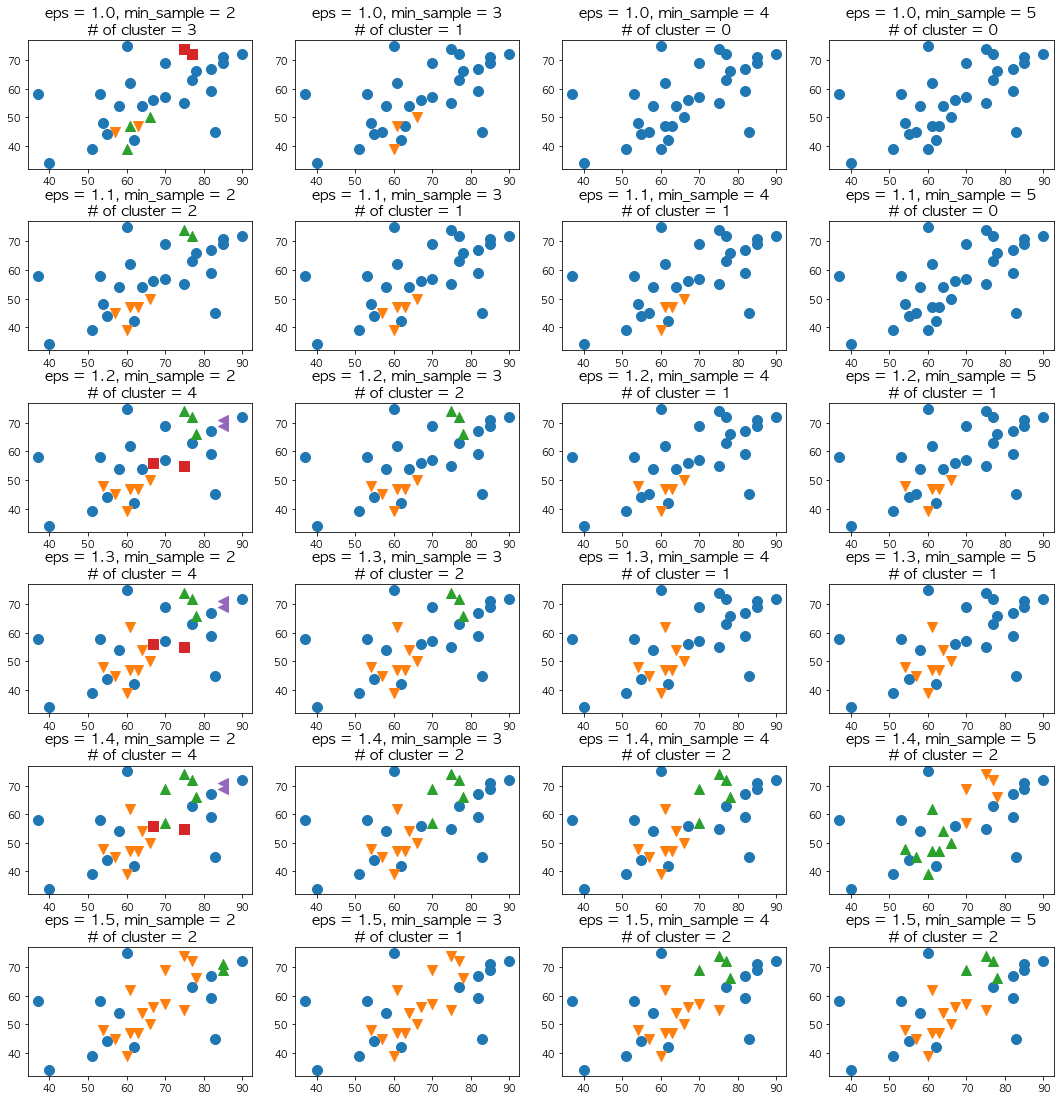

In [16]:
X = df_raw['DISSATIS']
Y = df_raw['CHANCE']

markers = ['o', 'v', '^', 's', '<', '>', 'p', 'D']

para_eps = [ k/10 for k in range(10,16,1) ]
para_min_sample = [2,3,4,5]

fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize=(15,15))
fig.tight_layout(w_pad=1, h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        clusters = dbscan.fit_predict(df_raw_x)
        clusters = clusters + 1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)):
            axes[i, j].scatter(X[clusters==clus], Y[clusters==clus],
                               marker=markers[n_clus], s=100)
            axes[i, j].set_title('eps = ' + str(eps) + ', min_sample = ' + \
                                 str(min_sample) + '\n # of cluster = ' + str(max(clusters)),
                                 fontsize=15)

In [17]:
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)

cluster_dbscan = dbscan.labels_

for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1

df_raw['ClusterDBScan'] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,3,0
1,63,64,51,54,63,73,47,5,3,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,3,1
4,81,78,56,66,71,83,47,3,2,2


In [18]:
ds_summary_db = df_raw.drop(['ClusterHierarchical', 'ClusterKmeans'],
                             axis=1, inplace=False).\
                        groupby('ClusterDBScan').agg(['min', 'mean', 'max'])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + '_' + level1
ds_summary_db.reset_index(inplace=True)

ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
